<a href="https://colab.research.google.com/github/kiriffpl/HeadHunter/blob/main/Project_2_%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [39]:
!pip install psycopg2
!pip install sqlalchemy

In [40]:
import pandas as pd
#пришлось делать через sql alchemy потому что псайкопиджи плохо ладит с коллабом
import psycopg2

In [41]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
dbname = 'project_sql'
user = 'skillfactory'
password = 'cCkxxLVrDE8EbvjueeMedPKt'
host = '84.201.134.129'
port = 5432
#c=connection #сразу сделаем переменную подклоючения что бы не печатать слово целиком каждый раз

In [42]:
from sqlalchemy import create_engine, text

# Настройка соединения с базой данных
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')
e = engine

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [ ]:
# текст запроса
query3_1 = f'''
    select count(*)
    from vacancies

             '''

In [ ]:
# текст запроса
df=pd.read_sql_query(query3_1, e)
print(df['count'][0])

49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [ ]:
# текст запроса
query3_2 = f'''
    select count(*)
    from employers
             '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query3_2, e)
print(df['count'][0])

23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# текст запроса
query3_3 = f'''
    select count(*)
    from areas
             '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query3_3, e)
print(df['count'][0])

1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# текст запроса
query3_4= f'''
    select count(*)
    from industries
             '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query3_4, e)
print(df['count'][0])

294


***

# ***Исходя из предварительного анализа данных мы можем сделать вывод, что количество вакансий в 2 раза превышает количество работодателей, значит, в среднем, каждый работодатель предлагает 2 вакансии. Также мы можем наблюдать, что количество регионов в которых зарегистрированны вакансии равно 1362 что означает что почти в каждом регионе страны есть активные вакансии***

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query4_1= f'''
                SELECT
                r.name AS area,
                COUNT(v.id) AS cnt
                FROM
                areas r
                LEFT JOIN
                vacancies v ON r.id = v.area_id
                GROUP BY
                r.name
                ORDER BY
                cnt DESC;
            '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query4_1, e)
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


In [ ]:
#Строим таблицу
import seaborn as sns
import matplotlib.pyplot as plt
df_sorted = df.sort_values(by='cnt', ascending=False)


plt.figure(figsize=(100, 100))
heatmap_data = df_sorted.set_index('area').T
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.30)


plt.title('Динамика количества вакансий по городам')
plt.xlabel('Города')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=90)
plt.show()


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query4_2 = f'''
SELECT
    COUNT(*) AS cnt
FROM
    vacancies
WHERE
    salary_from IS NOT NULL OR salary_to IS NOT NULL;

            '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query4_2, e)
df

,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст запроса
query4_3 =f'''
SELECT
    ROUND(AVG(salary_from)) AS avg_salary_from,
    ROUND(AVG(salary_to)) AS avg_salary_to
FROM
    vacancies
WHERE
    salary_from IS NOT NULL OR salary_to IS NOT NULL;
             '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query4_3, e)
df

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query4_4=f'''
SELECT
    schedule,
    employment,
    COUNT(*) AS cnt
FROM
    vacancies
GROUP BY
    schedule, employment
ORDER BY
    cnt DESC;
'''

In [ ]:
# результат запроса
df=pd.read_sql_query(query4_4, e)
df

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


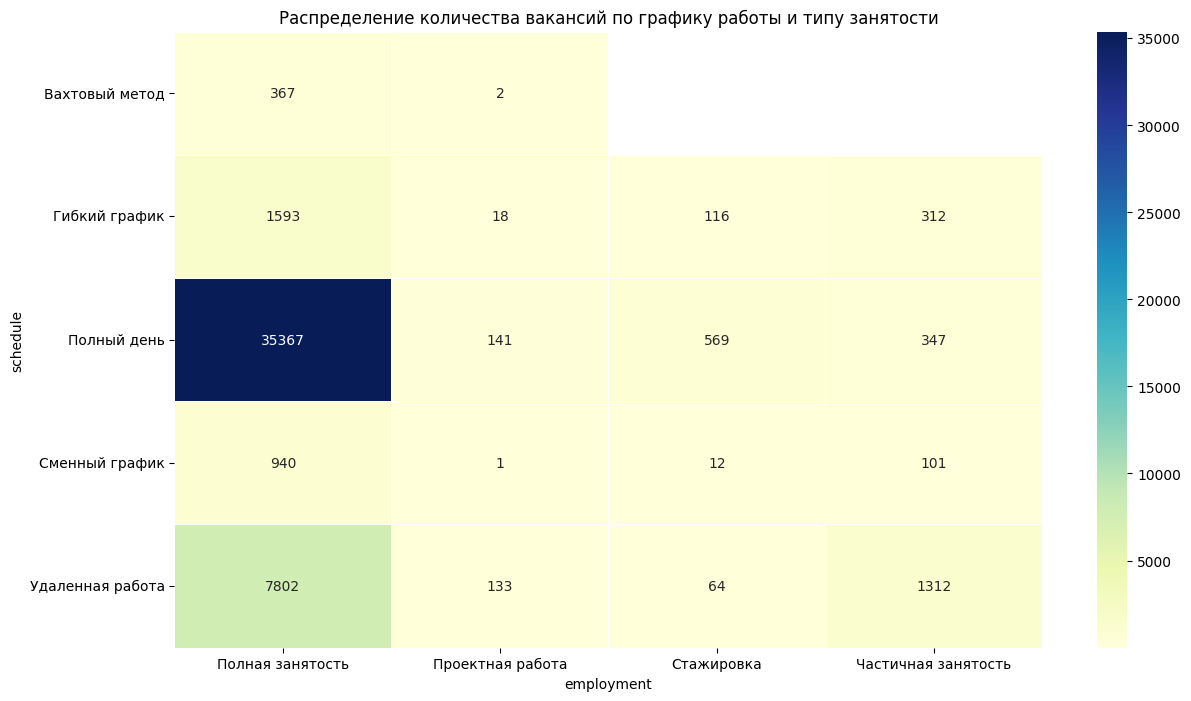

In [ ]:
#строим таблицу
pivot_table = df.pivot_table(index="schedule", columns="employment", values="cnt", aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Распределение количества вакансий по графику работы и типу занятости')
plt.show()



5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
#текст запроса
query4_5 =f'''SELECT
    experience,
    COUNT(*) AS cnt
FROM
    vacancies
GROUP BY
    experience
ORDER BY
    cnt ASC;
'''

In [ ]:
# результат запроса
df=pd.read_sql_query(query4_5, e)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


<ipython-input-24-2d472da66e47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='cnt', y='experience', inner='stick', palette='Dark2')


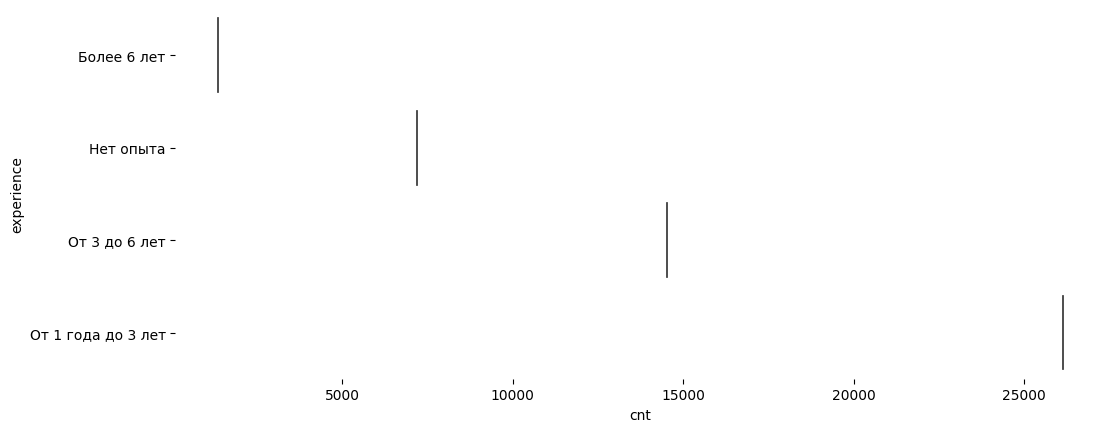

In [ ]:
# @title experience vs cnt

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['experience'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='cnt', y='experience', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***

# ***Исходя из детального анализа данных мы можем сделать вывод что большее количество вакансий приходится на города миллионники и столицы соседних регионах Также мы видим что 24000 человек заполнили только одно поля с зарплатой что означает что почти четверти аудитории не важно от скольки они будут получать важную только верхний предел Средняя зарплата среди рассматриваемых вакансии составляет 80000 рублей. Большинство людей оставивших резюме рассчитывают на полную занятость полный рабочий день или же на удаленную работу и полную занятость также прослеживается что чем больше опыт работы тем меньше вакансии оставили люди***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query5= f'''
WITH re AS (
    SELECT
        e.name,
        COUNT(v.id) AS cnt,
        ROW_NUMBER() OVER (ORDER BY COUNT(v.id) DESC) AS employer
    FROM
        employers e
    LEFT JOIN
        vacancies v ON e.id = v.employer_id
    GROUP BY
        e.name
)
SELECT
    name,
    cnt,
    employer
FROM
    re
WHERE
    employer IN (1, 5);

             '''

In [ ]:
# результат запроса
df=pd.read_sql_query(query5, e)
df

,name,cnt,employer
0,Яндекс,1933,1
1,Газпром нефть,331,5


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
#текст запроса
query5_2=f'''
select
    a.name area,
    count(DISTINCT v.id) vacation,
    count(distinct e.id) company
from areas a
    left join vacancies v on a.id = v.area_id
    left join employers e on a.id = e.area
where v.area_id is null
group by a.name
order by  3 desc
'''


In [ ]:
#результат запроса
df=pd.read_sql_query(query5_2, e)
df

,area,vacation,company
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
#текст запроса
query5_3=f''' SELECT
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS num_regions
FROM
    employers e
JOIN
    vacancies v ON e.id = v.employer_id
GROUP BY
    e.name
ORDER BY
    num_regions DESC;
    '''


In [ ]:
# результат запроса
df=pd.read_sql_query(query5_3, e)
df

,employer_name,num_regions
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [ ]:
#текст запроса
query5_4 = f'''SELECT
               COUNT(e.id) AS num_employers_without_industry
             FROM
               employers e
            LEFT JOIN
               employers_industries ei ON e.id = ei.employer_id
            WHERE
               ei.industry_id IS NULL;
'''

In [ ]:
# результат запроса
Df = pd.read_sql_query(query5_4, e)
Df

,num_employers_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [ ]:
# текст запроса
query5_5=f'''SELECT
    e.name
FROM
    employers e
JOIN (
    SELECT
        employer_id
    FROM
        employers_industries
    GROUP BY
        employer_id
    HAVING
        COUNT(industry_id) = 4
) ei ON e.id = ei.employer_id
ORDER BY
    e.name
LIMIT 1 OFFSET 2;
'''

In [ ]:
#результат запроса
df=pd.read_sql_query(query5_5, e)
df

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
query5_6= f'''
SELECT
    COUNT(DISTINCT e.id) AS num_employers
FROM
    employers e
JOIN
    employers_industries ei ON e.id = ei.employer_id
JOIN
    industries i ON ei.industry_id = i.id
WHERE
    i.name = 'Разработка программного обеспечения';
    '''


In [ ]:
#результат запроса
df=pd.read_sql_query(query5_6, e)
df

,num_employers
0,3553


In [ ]:
Df = pd.read_sql_query(query5_6, e)
Df

,num_employers
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [ ]:
# код для получения списка городов-милионников
import pandas as pd

# URL страницы Wikipedia с таблицей городов-миллионеров
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

# Извлечение всех таблиц на странице
tables = pd.read_html(url)

# Предполагается, что нужная таблица является первой на странице
cities_table = tables[0]

# Извлечение списка городов
cities_list = cities_table['Город'].tolist()

# Вывод списка городов
print(cities_list)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [ ]:
query5_7=f'''
SELECT
    a.name AS area_name,
    COUNT(v.id) AS num_vacations
FROM
    vacancies v
Join
    areas a on a.id = v.area_id
join
    employers e on v.employer_id = e.id
where
    e.name = 'Яндекс'
GROUP BY
    a.name
ORDER BY
    num_Vacations DESC;
    '''


In [ ]:
# результат запроса
Df = pd.read_sql_query(query5_7, e)

df_filtered = Df[Df['area_name'].isin(cities_list)].reset_index(drop=True)

num = sum(df_filtered['num_vacations'])
al_row = pd.DataFrame({'area_name': ['Всего'], 'total': [num]})
al_row

,area_name,total
0,Всего,485



# ***глядя на данные связанные с работодателями мы можем установить что абсолютный лидер на рынке компания Яндекс так как она предлагает большее количество вакансий в большем количестве регионов также можем заметить аномально большое количество работодателей которые предпочли не указывать свою сферу деятельности что означает что скорее всего нигде деятельность не совсем легальна. Можем заметить моду среди работодателей на предложение kansasii по разработке программного обеспечения что говорит о дефиците в этой отрасли или а слишком высоком спросе***

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [46]:
query6 = f'''

select
    count(v.name)

from
    vacancies v

WHERE
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)

    AND (v.name ILIKE '%junior%'
    OR v.experience ILIKE '%Нет опыта%'
    OR v.employment ILIKE '%Стажировка%')
'''




In [49]:
df = pd.read_sql_query(query6, e)
df

TypeError: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [ ]:
query6_2= '''

select
    count(v.name)

from vacancies v

WHERE
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)

    AND (v.name ILIKE '%junior%'
    OR v.experience ILIKE '%Нет опыта%'
    OR v.employment ILIKE '%Стажировка%')
'''



In [ ]:
#результат запроса
df=pd.read_sql_query(query6_2, e)
df

TypeError: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
query_6_3 = f'''SELECT count(vacancies.name) as n_vac
                FROM vacancies
                WHERE (lower(vacancies.name) LIKE '%data scientist%'
                or lower(vacancies.name) LIKE '%data science%'
                or lower(vacancies.name) LIKE '%исследователь данных%'
                or lower(vacancies.name) LIKE '%ml%' and vacancies.name NOT LIKE '%HTML%' and vacancies.name not like '%QML%'
                or lower(vacancies.name) LIKE '%machine learning%'
                or lower(vacancies.name) LIKE '%машинн%обучен%')
                and(lower(vacancies.key_skills) LIKE '%postgres%'
                or lower(vacancies.key_skills) LIKE '%sql%')
             '''

#df=pd.read_sql_query(query6_3, c)
print(sum(df['count']))


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [51]:
query6_4 = f'''
SELECT
    count(vacancies.name) as n_vac
FROM
    vacancies
WHERE
    (lower(vacancies.name) LIKE '%data scientist%'
               or lower(vacancies.name) LIKE '%data science%'
                or lower(vacancies.name) LIKE '%исследователь данных%'
                or lower(vacancies.name) LIKE '%ml%' and vacancies.name NOT LIKE '%HTML%' and vacancies.name not like '%QML%'
                or lower(vacancies.name) LIKE '%machine learning%'
                or lower(vacancies.name) LIKE '%машинн%обучен%')
                and(lower(vacancies.key_skills) LIKE '%python%')
             '''



In [52]:
#результат запроса
df=pd.read_sql_query(query6_4, e)
df
print(sum(df['count']))

TypeError: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
query6_5 = f'''
select
    round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2)
from
    vacancies v
where
    (v.name ilike '%data scientist%') or (v.name ilike '%data science%')
 or (v.name ilike '%исследователь данных%%')
  or ((v.name like 'ML%') and (v.name not like '%HTML%'))
  or (v.name ilike '%machine learning%') or (v.name ilike '%машинн%обучен%') and (v.key_skills is not null)

             '''



In [ ]:
#результат запроса
df=pd.read_sql_query(query6_6, e)
df

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [43]:
query6_6 = f'''
    select
          experience,
        ROUND(avg(COALESCE((salary_to + salary_from)/2, salary_from, salary_to)), 0) AS result

    from vacancies

where   (name ILIKE '%data scientist%' OR name ILIKE '%data science%' OR name ILIKE '%исследователь данных%'
        OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
        OR name ILIKE '%machine learning%'
        OR name ILIKE '%машинн%обучен%'
        )
    AND (salary_from is not null OR salary_to is not null)

    GROUP BY experience

'''

In [44]:
#результат запроса
df=pd.read_sql_query(query6_6, e)
df

TypeError: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

***

In [ ]:
# выводы по предметному анализу

# Общий вывод по проекту

In [ ]:
Общий вывод добавлю чуть позднее, у меня почему то с 6 пункта отказывается работать коллаб.